In [45]:
import files_process_save as fps
import pathlib
import pandas as pd
import numpy as np
from typing import Union
import seaborn as sns
import matplotlib.pyplot as plt

upload csv file

In [46]:
file_path = fps.check_file("Sludge age and f_m.csv")
df = pd.read_csv(file_path)
df.set_index("date", inplace=True)
df.index = pd.to_datetime(df.index, dayfirst=True)

In [47]:
df

,F_M - A,F_M - B,Sludge Age - A,Sludge Age - B
date,,,,
2010-01-01 07:00:00,0.23,0.22,3.44,2.92
2010-01-02 07:00:00,0.18,0.17,3.78,3.04
2010-01-03 07:00:00,0.21,0.22,3.82,3.18
2010-01-04 07:00:00,0.21,0.22,3.40,2.97
2010-01-05 07:00:00,0.23,0.23,3.70,2.70
...,...,...,...,...
2020-12-27 00:00:00,0.25,0.23,2.75,3.41
2020-12-28 00:00:00,0.26,0.24,2.91,3.10
2020-12-29 00:00:00,0.26,0.25,2.82,3.15


Remove out of range values

In [48]:
def check_values_range(df: pd.DataFrame) -> pd.DataFrame:
    """
    Check and replace incorrect values with nan.
    (Zero values or values out of defined ranges)
    """
    df.replace(0, np.nan, inplace=True)
    ranges_lst = [(0.05, 0.6), (0.5, 9)]
    col_names_lst = ["F_M", "Sludge Age"]
    
    for i in range(2):
        name = col_names_lst[i]
        low = ranges_lst[i][0]
        high = ranges_lst[i][1]
        df.loc[:, df.columns.str.contains(name)] = df.loc[
            :, df.columns.str.contains(name)
        ].apply(lambda x: [value if low < value < high else np.nan for value in x])

    return df

In [49]:
df = check_values_range(df)

Interpolate missing data by methode time

In [50]:
df.interpolate(inplace=True, method="time")
df = df.fillna(method='bfill')

Visual data

In [51]:
df

,F_M - A,F_M - B,Sludge Age - A,Sludge Age - B
date,,,,
2010-01-01 07:00:00,0.23,0.22,3.44,2.92
2010-01-02 07:00:00,0.18,0.17,3.78,3.04
2010-01-03 07:00:00,0.21,0.22,3.82,3.18
2010-01-04 07:00:00,0.21,0.22,3.40,2.97
2010-01-05 07:00:00,0.23,0.23,3.70,2.70
...,...,...,...,...
2020-12-27 00:00:00,0.25,0.23,2.75,3.41
2020-12-28 00:00:00,0.26,0.24,2.91,3.10
2020-12-29 00:00:00,0.26,0.25,2.82,3.15


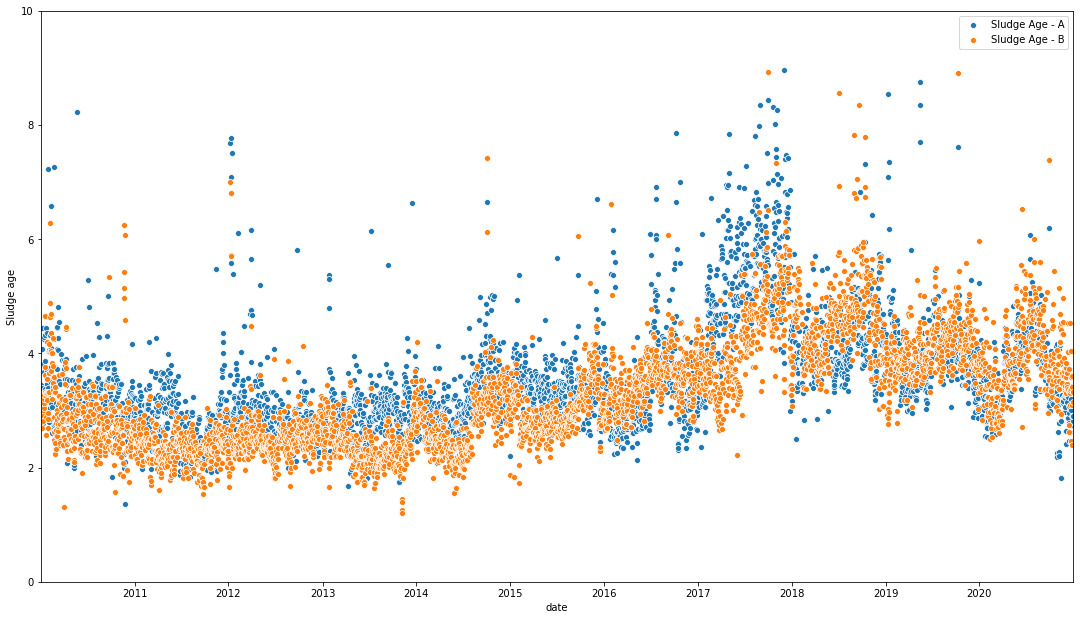

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
_=sns.scatterplot(data=df, x=df.index, y="Sludge Age - A", ax=ax)
_=sns.scatterplot(data=df, x=df.index, y="Sludge Age - B", ax=ax)
plt.ylabel("Sludge age")
plt.legend(["Sludge Age - A", "Sludge Age - B"])
plt.xlim(df.index.min(), df.index.max())
_=plt.ylim(0, 10)

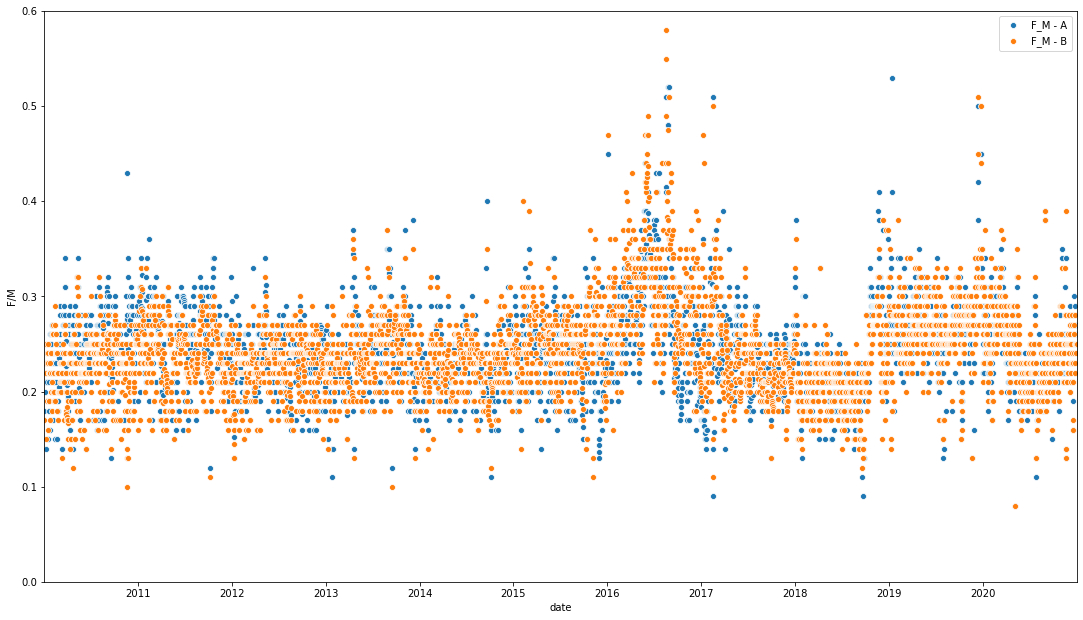

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
_=sns.scatterplot(data=df, x=df.index, y="F_M - A", ax=ax)
_=sns.scatterplot(data=df, x=df.index, y="F_M - B", ax=ax)
plt.ylabel("F/M")
plt.legend(["F_M - A", "F_M - B"])
plt.xlim(df.index.min(), df.index.max())
_=plt.ylim(0, 0.6)

Remove local outliers

In [54]:
def IQR_cal (df: pd.DataFrame):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return IQR, Q1, Q3

In [55]:
for i in range(len(df)):
    window = 10
    jump = 5
    j=i*jump
    if j+window<len(df):
        IQR, Q1, Q3 = IQR_cal(df.iloc[j:j+window,:])
        k=j
        while k<j+window:
            for z in range(4):
                if (df.iloc[k,z] < (Q1[z] - 1 * IQR[z]) or (df.iloc[k,z] > (Q3[z] + 1 * IQR[z]))):
                    df.iloc[k,z] = np.nan
            k=k+1

interpolate and fill values insted of nan

In [56]:
df.interpolate(inplace=True, method="time")
df = df.fillna(method='bfill')

Revisual data

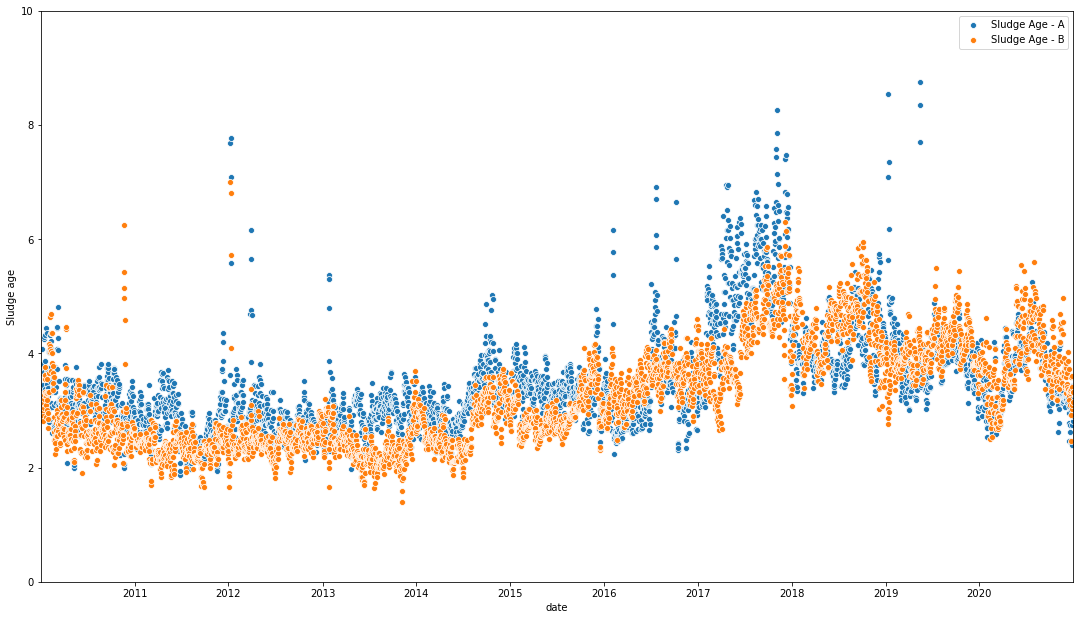

In [57]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
_=sns.scatterplot(data=df, x=df.index, y="Sludge Age - A", ax=ax)
_=sns.scatterplot(data=df, x=df.index, y="Sludge Age - B", ax=ax)
plt.ylabel("Sludge age")
plt.legend(["Sludge Age - A", "Sludge Age - B"])
plt.xlim(df.index.min(), df.index.max())
_=plt.ylim(0, 10)

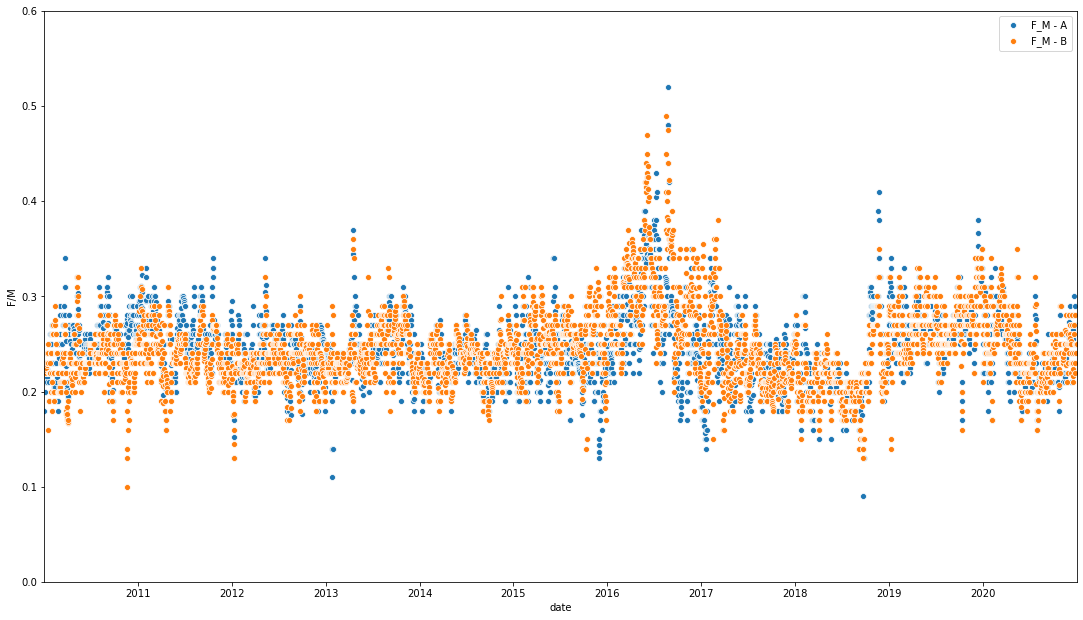

In [58]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
_=sns.scatterplot(data=df, x=df.index, y="F_M - A", ax=ax)
_=sns.scatterplot(data=df, x=df.index, y="F_M - B", ax=ax)
plt.ylabel("F/M")
plt.legend(["F_M - A", "F_M - B"])
plt.xlim(df.index.min(), df.index.max())
_=plt.ylim(0, 0.6)

In [59]:
df = df.round(decimals=2)

In [60]:
df

,F_M - A,F_M - B,Sludge Age - A,Sludge Age - B
date,,,,
2010-01-01 07:00:00,0.23,0.22,3.44,2.92
2010-01-02 07:00:00,0.18,0.22,3.78,3.04
2010-01-03 07:00:00,0.21,0.22,3.82,3.00
2010-01-04 07:00:00,0.21,0.22,3.40,2.97
2010-01-05 07:00:00,0.23,0.23,3.70,2.94
...,...,...,...,...
2020-12-27 00:00:00,0.25,0.23,2.75,3.41
2020-12-28 00:00:00,0.26,0.24,2.91,3.10
2020-12-29 00:00:00,0.26,0.25,2.82,3.15


In [61]:
df.index = pd.to_datetime(df.index, dayfirst=True).date

In [62]:
df

,F_M - A,F_M - B,Sludge Age - A,Sludge Age - B
2010-01-01,0.23,0.22,3.44,2.92
2010-01-02,0.18,0.22,3.78,3.04
2010-01-03,0.21,0.22,3.82,3.00
2010-01-04,0.21,0.22,3.40,2.97
2010-01-05,0.23,0.23,3.70,2.94
...,...,...,...,...
2020-12-27,0.25,0.23,2.75,3.41
2020-12-28,0.26,0.24,2.91,3.10
2020-12-29,0.26,0.25,2.82,3.15
2020-12-30,0.27,0.25,2.91,3.32


In [63]:
df.index.name = 'date'

In [64]:
df.to_csv(pathlib.Path("clean_tables/sludge_age_f_m.csv"), index=True)

In [38]:
# fig, ax1 = plt.subplots()
# fig.set_size_inches(18.5, 10.5)
# _=sns.scatterplot(data=df, x=df.index, y="Sludge Age - A", ax=ax1)
# ax1.set_ylabel("Sludge age")
# ax1.legend(["Sludge age - A"])
# ax2 = ax1.twinx()
# _=sns.scatterplot(data=df, x=df.index, y="F_M - A", ax=ax2, color = 'tab:red')
# ax2.set_ylabel("F_M - A")
# ax2.legend(["F/M - A"])
# plt.xlim(df.index.min(), df.index.max())

In [39]:
df['Month'] = pd.DatetimeIndex(df.index).month
df['Year'] = pd.DatetimeIndex(df.index).year
df['F_M'] = df.iloc[:, np.r_[0: 2]].mean(axis=1)
df['Sludge_age'] = df.iloc[:, np.r_[2: 4]].mean(axis=1)

In [40]:
df

,F_M - A,F_M - B,Sludge Age - A,Sludge Age - B,Month,Year,F_M,Sludge_age
2010-01-01,0.23,0.22,3.44,2.92,1,2010,0.225,3.180
2010-01-02,0.18,0.22,3.78,3.04,1,2010,0.200,3.410
2010-01-03,0.21,0.22,3.82,3.00,1,2010,0.215,3.410
2010-01-04,0.21,0.22,3.40,2.97,1,2010,0.215,3.185
2010-01-05,0.23,0.23,3.70,2.94,1,2010,0.230,3.320
...,...,...,...,...,...,...,...,...
2020-12-27,0.25,0.23,2.75,3.41,12,2020,0.240,3.080
2020-12-28,0.26,0.24,2.91,3.10,12,2020,0.250,3.005
2020-12-29,0.26,0.25,2.82,3.15,12,2020,0.255,2.985
2020-12-30,0.27,0.25,2.91,3.32,12,2020,0.260,3.115


Text(0.5, 1.0, 'F_M')

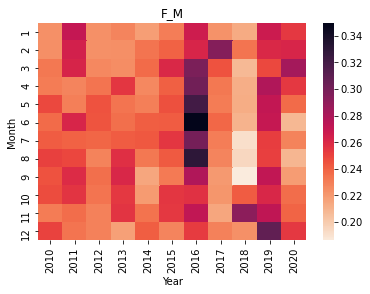

In [41]:
table = pd.pivot_table(df, values=df.columns[6], index=['Month'], columns=['Year'])
ax = sns.heatmap(table, cmap="rocket_r")
plt.title(df.columns[6])

Text(0.5, 1.0, 'Sludge_age')

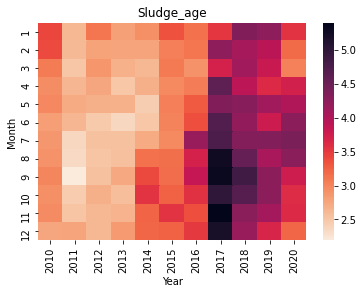

In [42]:
table = pd.pivot_table(df, values=df.columns[7], index=['Month'], columns=['Year'])
ax = sns.heatmap(table, cmap="rocket_r")
plt.title(df.columns[7])